In [268]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [269]:
import os
print os.getcwd()

/Users/leahgaeta/DAT-SM-18/projects/final-project/04-notebook-rough-draft


In [270]:
df_team = pd.read_csv("../team_data.csv")
print df_team.head()

   year league_id team_id franchise_id div_id  rank    g  ghome   w   l  \
0  1960        AL     BAL          BAL    NaN     2  154     77  89  65   
1  1960        AL     BOS          BOS    NaN     7  154     77  65  89   
2  1960        AL     CHA          CHW    NaN     3  154     77  87  67   
3  1960        NL     CHN          CHC    NaN     7  156     79  60  94   
4  1960        NL     CIN          CIN    NaN     6  154     77  67  87   

       ...         dp    fp               name              park  attendance  \
0      ...        172  0.98  Baltimore Orioles  Memorial Stadium     1187849   
1      ...        156  0.97     Boston Red Sox    Fenway Park II     1129866   
2      ...        175  0.98  Chicago White Sox     Comiskey Park     1644460   
3      ...        133  0.97       Chicago Cubs     Wrigley Field      809770   
4      ...        155  0.97    Cincinnati Reds     Crosley Field      663486   

   bpf  ppf  team_id_br  team_id_lahman45  team_id_retro  
0   99   

In [271]:
df_team.count()

year                1462
league_id           1462
team_id             1462
franchise_id        1462
div_id              1288
rank                1462
g                   1462
ghome               1462
w                   1462
l                   1462
div_win             1260
wc_win               624
lg_win              1434
ws_win              1434
r                   1462
ab                  1462
h                   1462
double              1462
triple              1462
hr                  1462
bb                  1462
so                  1462
sb                  1462
cs                  1462
hbp                  480
sf                   480
ra                  1462
er                  1462
era                 1462
cg                  1462
sho                 1462
sv                  1462
ipouts              1462
ha                  1462
hra                 1462
bba                 1462
soa                 1462
e                   1462
dp                  1462
fp                  1462


In [272]:
#can see that there are missing values, specifically in hbp and sf columns
#these will be needed later for the analysis so will need to fill the missing null values with zeros

df_team.fillna(value = 0, inplace = True)

#need to check now
df_team.count()

year                1462
league_id           1462
team_id             1462
franchise_id        1462
div_id              1462
rank                1462
g                   1462
ghome               1462
w                   1462
l                   1462
div_win             1462
wc_win              1462
lg_win              1462
ws_win              1462
r                   1462
ab                  1462
h                   1462
double              1462
triple              1462
hr                  1462
bb                  1462
so                  1462
sb                  1462
cs                  1462
hbp                 1462
sf                  1462
ra                  1462
er                  1462
era                 1462
cg                  1462
sho                 1462
sv                  1462
ipouts              1462
ha                  1462
hra                 1462
bba                 1462
soa                 1462
e                   1462
dp                  1462
fp                  1462


In [273]:
#list of column names
list(df_team)

['year',
 'league_id',
 'team_id',
 'franchise_id',
 'div_id',
 'rank',
 'g',
 'ghome',
 'w',
 'l',
 'div_win',
 'wc_win',
 'lg_win',
 'ws_win',
 'r',
 'ab',
 'h',
 'double',
 'triple',
 'hr',
 'bb',
 'so',
 'sb',
 'cs',
 'hbp',
 'sf',
 'ra',
 'er',
 'era',
 'cg',
 'sho',
 'sv',
 'ipouts',
 'ha',
 'hra',
 'bba',
 'soa',
 'e',
 'dp',
 'fp',
 'name',
 'park',
 'attendance',
 'bpf',
 'ppf',
 'team_id_br',
 'team_id_lahman45',
 'team_id_retro']

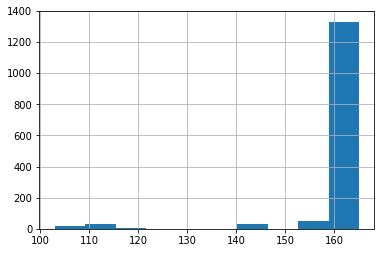

In [274]:
#does every team play the same numnber of games?
#variable 'g' is number of games played
df_team['g'].hist()

One can see that not every team from each year plays the same number of games. Therefore, a new column titled 'wp' for Win Percentage must be made.  This is ultimately what one wants to predict from the model. 

In [275]:
#to calculate win percentage 'wp', take the number of games won 'w' divided by total number of games played 'g'

df_team['wp'] = df_team['w']/df_team['g']
print df_team['wp'].head()

0    0.577922
1    0.422078
2    0.564935
3    0.384615
4    0.435065
Name: wp, dtype: float64


For the analysis, offensive & defensive metrics will be the variables used to predict winning percentage. The offensive metrics include Runs (r), Singles (single = h - double - triple - hr), Doubles (double), Triples (triple), Home Runs (hr), Walks (bb), and Strikeouts (so). A new column will need to be made for total number of Singles (single). To account for the varying number of games played by each team during the seasons, the offensive metrics need to be adjusted. Total number of At Bats (ab) does not take into account Walks (bb), and therefore a new column for Plate Appearances (pa) must be made. The offensive metrics will then become Runs per PA (rppa), Singles per PA (sppa), Doubles per PA (dppa), Triples per PA (tppa), Home Runs per PA (hrppa), Walks per PA (bbppa), and Strikeouts per PA (kppa). New columns will need to be made for these variables.

In [276]:
#make a new column for Singles
#to calculate singles, take the number of hits (h) and subtract doubles (double), triples (triple), and home runs (hr)

df_team['singles'] = df_team['h'] - df_team['double'] - df_team['triple'] - df_team['hr']
print df_team['singles'].head()

0     945
1     969
2    1010
3     913
4     914
Name: singles, dtype: int64


In [277]:
#make a new column for Plate Appearances
#plate appearances can be calculated by adding At bats (ab), Walks (bb), Hit by Pitch (hbp), Sacrifice Hit (sh), 
#Sacrifice Fly (sf), and Times Reached on Defensive Interference together.
#This Plate Appearance (pa) calculation does not include sac hit (only sac fly, sf) since there is no data for sh
#or times reached on defensive indifference, such as catcher's interference

df_team['pa'] = df_team['ab'] + df_team['bb'] - df_team['hbp'] - df_team['sf']
print df_team['pa'].head()

0    5766.0
1    5785.0
2    5758.0
3    5842.0
4    5801.0
Name: pa, dtype: float64


In [278]:
#now the offensive metrics need to be adjusted
#make new columns for Runs per PA (rppa), Singles per PA (sppa), Doubles per PA (dppa), 
#Triples per PA (tppa), Home Runs per PA (hrppa), Walks per PA (bbppa), and Strikeouts per PA (kppa)

df_team['rppa'] = df_team['r']/df_team['pa']
print df_team['rppa'].head()

df_team['sppa'] = df_team['singles']/df_team['pa']
print df_team['sppa'].head()

df_team['dppa'] = df_team['double']/df_team['pa']
print df_team['dppa'].head()

df_team['tppa'] = df_team['triple']/df_team['pa']
print df_team['tppa'].head()

df_team['hrppa'] = df_team['hr']/df_team['pa']
print df_team['hrppa'].head()

df_team['bbppa'] = df_team['bb']/df_team['pa']
print df_team['bbppa'].head()

df_team['kppa'] = df_team['so']/df_team['pa']
print df_team['kppa'].head()

0    0.118280
1    0.113742
2    0.128691
3    0.108524
4    0.110326
Name: rppa, dtype: float64
0    0.163892
1    0.167502
2    0.175408
3    0.156282
4    0.157559
Name: sppa, dtype: float64
0    0.035727
1    0.040449
2    0.042028
3    0.036460
4    0.039648
Name: dppa, dtype: float64
0    0.005723
1    0.005532
2    0.006600
3    0.008216
4    0.006895
Name: tppa, dtype: float64
0    0.021332
1    0.021435
2    0.019451
3    0.020370
4    0.024134
Name: hrppa, dtype: float64
0    0.103365
1    0.098531
2    0.098472
3    0.090894
4    0.088261
Name: bbppa, dtype: float64
0    0.138918
1    0.137943
2    0.112539
3    0.153543
4    0.147906
Name: kppa, dtype: float64


Again, offensive & defensive metrics will be the variables used to predict winning percentage in this analysis. Now that the offensive metrics are done, there needs to also be adjustments for the defensive metrics. The defensive metrics used will be Opponents Runs Scored (ra), Earned Runs Allowed (er), Hits Allowed (ha), Homeruns Allowed (hra), Walks Allowed (bba), Strikeouts by Pitcher (soa), Double Plays (dp), and Fielding Percentage (fp)*. Since Hits Allowed (ha) includes Homeruns Allowed (hra), a new column will need to be made for Non HR Hits Allowed (nhrha). All of these defensive metrics will be adjusted for Per Out Pitched (ipouts) to account for the different number of games played, excluding Fielding Percentage (fp) as it is already a percentage.  New columns will need to be made for these variables: Opponents Runs Scored per Out Pitched (rapop), Earned Runs Allowed per Out Pitched (erpop), Non HR Hits Allowed per Out Pitched (nhrhpop), Homeruns Allowed per Out Pitched (hrpop), Walks Allowed per Out Pitched (bbpop), Strikeouts by Pitcher per Out Pitched (kpop), and Double Plays per Out Pitched (dppop)*. Again, Fielding Percentage (fp) does not need to be adjusted.

*Fielding Percentage will be taken into account for the analysis since Errors (e) are included in the Fielding Percentage calculation. FP = (Putous + Assists)/Total Chances (Putous + Assists + Errors). Higher FP is indicative of less errors committed by the defense.

*For Double Plays per Out Pitched (dppop), Double Plays (dp) will need to be divided by 2 since a double play produces two outs

In [279]:
#make a new column for Non HR Hits Allowed (nhrha)
#take the total number of Hits Allowed (ha) subtracted by the total number of Homeruns Allowed (hra)

df_team['nhrha'] = df_team['ha'] - df_team['hra']
print df_team['nhrha'].head()

0    1105
1    1313
2    1211
3    1241
4    1283
Name: nhrha, dtype: int64


In [280]:
#now the defensive metrics need to be adjusted for Outs Pitched (ipouts) and make new columns

#Opponents Runs Scored per Out Pitched (rapop)
df_team['rapop'] = df_team['ra']/df_team['ipouts']
print df_team['rapop'].head()

#Earned Runs Allowed per Out Pitched (erpop) 
df_team['erpop'] = df_team['er']/df_team['ipouts']
print df_team['erpop'].head()

#Non HR Hits Allowed per Out Pitched (nhrhpop)
df_team['nhrhpop'] = df_team['nhrha']/df_team['ipouts']
print df_team['nhrhpop'].head()

#Homeruns Allowed per Out Pitched (hrpop)
df_team['hrpop'] = df_team['hra']/df_team['ipouts']
print df_team['hrpop'].head()

#Walks Allowed per Out Pitched (bbpop)
df_team['bbpop'] = df_team['bba']/df_team['ipouts']
print df_team['bbpop'].head()

#Strikeouts by Pitcher per Out Pitched (kpop)
df_team['kpop'] = df_team['soa']/df_team['ipouts']
print df_team['kpop'].head()

#Double Plays per Out Pitched (dppop)
df_team['dppop'] = df_team['dp']/df_team['ipouts']
print df_team['dppop'].head()

0    0.146909
1    0.189811
2    0.148926
3    0.184498
4    0.165947
Name: rapop, dtype: float64
0    0.130424
1    0.171198
2    0.133237
3    0.161198
4    0.148201
Name: erpop, dtype: float64
0    0.267879
1    0.321577
2    0.292300
3    0.295055
4    0.307674
Name: nhrhpop, dtype: float64
0    0.028364
1    0.031105
2    0.030654
3    0.036139
4    0.032134
Name: hrpop, dtype: float64
0    0.133818
1    0.142052
2    0.128651
3    0.134332
4    0.105995
Name: bbpop, dtype: float64
0    0.190303
1    0.187852
2    0.167753
3    0.191393
4    0.177458
Name: kpop, dtype: float64
0    0.041697
1    0.038207
2    0.042240
3    0.031621
4    0.037170
Name: dppop, dtype: float64


In [281]:
#now that the variables have all been adjusted, it's time to create a new clean data frame for the analysis

#identify columns to keep 
cols_to_keep = ['year', 'team_id', 'wp', 'rppa', 'sppa', 'dppa', 'tppa', 'hrppa', 'bbppa', 'kppa', 'rapop', 'erpop', 'nhrhpop', 'hrpop', 'bbpop', 'kpop', 'dppop', 'fp']

data = df_team[cols_to_keep]
print data.head()

   year team_id        wp      rppa      sppa      dppa      tppa     hrppa  \
0  1960     BAL  0.577922  0.118280  0.163892  0.035727  0.005723  0.021332   
1  1960     BOS  0.422078  0.113742  0.167502  0.040449  0.005532  0.021435   
2  1960     CHA  0.564935  0.128691  0.175408  0.042028  0.006600  0.019451   
3  1960     CHN  0.384615  0.108524  0.156282  0.036460  0.008216  0.020370   
4  1960     CIN  0.435065  0.110326  0.157559  0.039648  0.006895  0.024134   

      bbppa      kppa     rapop     erpop   nhrhpop     hrpop     bbpop  \
0  0.103365  0.138918  0.146909  0.130424  0.267879  0.028364  0.133818   
1  0.098531  0.137943  0.189811  0.171198  0.321577  0.031105  0.142052   
2  0.098472  0.112539  0.148926  0.133237  0.292300  0.030654  0.128651   
3  0.090894  0.153543  0.184498  0.161198  0.295055  0.036139  0.134332   
4  0.088261  0.147906  0.165947  0.148201  0.307674  0.032134  0.105995   

       kpop     dppop    fp  
0  0.190303  0.041697  0.98  
1  0.187852  0

In [282]:
#take a deeper look into the data
data.describe()

,year,wp,rppa,sppa,dppa,tppa,hrppa,bbppa,kppa,rapop,erpop,nhrhpop,hrpop,bbpop,kpop,dppop,fp
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,1989.630643,0.499614,0.118235,0.165000,0.042691,0.005692,0.024186,0.087740,0.162199,0.164023,0.147989,0.295573,0.033562,0.121673,0.224309,0.034655,0.977182
std,15.783454,0.070841,0.013740,0.009905,0.006702,0.001724,0.006351,0.010650,0.027327,0.022480,0.021745,0.019226,0.007679,0.016229,0.036834,0.004252,0.006115
min,1960.000000,0.248447,0.079452,0.130509,0.025892,0.001786,0.007866,0.059227,0.095462,0.104547,0.090828,0.225182,0.013468,0.078058,0.132184,0.021863,0.960000
25%,1976.250000,0.450617,0.109012,0.157915,0.037413,0.004478,0.019461,0.080388,0.143032,0.148171,0.132598,0.282323,0.027797,0.109999,0.198405,0.031626,0.970000
50%,1991.000000,0.500000,0.117880,0.164674,0.043040,0.005532,0.023878,0.086891,0.159685,0.162331,0.146591,0.295419,0.033482,0.120788,0.222428,0.034594,0.980000
75%,2003.000000,0.549383,0.127513,0.172049,0.047743,0.006687,0.028328,0.095103,0.179158,0.178495,0.161837,0.308822,0.038933,0.132021,0.248505,0.037503,0.981000
max,2015.000000,0.716049,0.159726,0.202749,0.060587,0.012781,0.043730,0.125750,0.264975,0.256750,0.236266,0.354556,0.056099,0.182495,0.329171,0.048986,0.991000


In [283]:
#look into any possible correlations by creating a correlation matrix
data.corr()

,year,wp,rppa,sppa,dppa,tppa,hrppa,bbppa,kppa,rapop,erpop,nhrhpop,hrpop,bbpop,kpop,dppop,fp
year,1.000000,0.004688,0.384612,-0.237543,0.742227,-0.335820,0.420593,0.030401,0.645661,0.321341,0.413875,0.138923,0.477559,0.026108,0.655339,-0.047535,0.708609
wp,0.004688,1.000000,0.499900,0.106498,0.156048,0.038808,0.298487,0.314655,-0.130555,-0.542703,-0.491744,-0.459358,-0.234575,-0.430494,0.164247,-0.143158,0.209708
rppa,0.384612,0.499900,1.000000,0.040469,0.634464,-0.066100,0.737675,0.423182,0.070916,0.378381,0.428145,0.202806,0.512575,0.083492,0.225606,0.113371,0.339576
sppa,-0.237543,0.106498,0.040469,1.000000,-0.154656,0.251899,-0.419646,-0.292295,-0.585079,-0.062158,-0.081981,0.172337,-0.233631,-0.064298,-0.326046,0.144122,-0.216202
dppa,0.742227,0.156048,0.634464,-0.154656,1.000000,-0.146971,0.476239,0.080286,0.370297,0.392406,0.465947,0.230286,0.486221,0.065463,0.460350,0.037636,0.563411
tppa,-0.335820,0.038808,-0.066100,0.251899,-0.146971,1.000000,-0.330679,-0.194515,-0.253787,-0.119515,-0.151616,0.017490,-0.234879,-0.066638,-0.294205,0.029452,-0.257027
hrppa,0.420593,0.298487,0.737675,-0.419646,0.476239,-0.330679,1.000000,0.284378,0.387691,0.353139,0.404279,0.060462,0.599167,0.090364,0.391694,0.036922,0.400581
bbppa,0.030401,0.314655,0.423182,-0.292295,0.080286,-0.194515,0.284378,1.000000,-0.011261,0.097251,0.107324,-0.000200,0.141279,0.135001,0.033640,0.004680,0.065624
kppa,0.645661,-0.130555,0.070916,-0.585079,0.370297,-0.253787,0.387691,-0.011261,1.000000,0.172369,0.226195,-0.078648,0.383282,0.019611,0.667184,-0.134206,0.473388
rapop,0.321341,-0.542703,0.378381,-0.062158,0.392406,-0.119515,0.353139,0.097251,0.172369,1.000000,0.984661,0.743124,0.750297,0.581750,-0.002285,0.267597,0.069797


One can see that there are especially strong correlations between Runs per PA (rppa) & HR per PA (hrppa), Opponents Runs Scored per OP (rapop) & Earned Runs per OP (erpop) & Homeruns Allowed per OP (hrpop).  This makes sense because a Homerun is always going to score at least one run, and up to four runs depending on how many baserunners there are during the Plate Appearance. Opponents Runs Scored per OP and Earned Runs per OP are also going to be strongly correlated since an earned run will always count towards an opponent's total runs scored. It therefore makes sense to drop 'rppa', 'rapop', and 'erpop' from the dataframe, but keep 'hrppa' and 'hrpop'.  This will allow for a better analysis to win percentage.

In [284]:
#now need to create another new data frame for the analysis by dropping 'rppa', 'rapop', and 'erpop'

#identify new columns to keep 
new_cols_to_keep = ['year', 'team_id', 'wp', 'sppa', 'dppa', 'tppa', 'hrppa', 'bbppa', 'kppa', 'nhrhpop', 'hrpop', 'bbpop', 'kpop', 'dppop', 'fp']

adj_data = df_team[new_cols_to_keep]
print adj_data.head()

   year team_id        wp      sppa      dppa      tppa     hrppa     bbppa  \
0  1960     BAL  0.577922  0.163892  0.035727  0.005723  0.021332  0.103365   
1  1960     BOS  0.422078  0.167502  0.040449  0.005532  0.021435  0.098531   
2  1960     CHA  0.564935  0.175408  0.042028  0.006600  0.019451  0.098472   
3  1960     CHN  0.384615  0.156282  0.036460  0.008216  0.020370  0.090894   
4  1960     CIN  0.435065  0.157559  0.039648  0.006895  0.024134  0.088261   

       kppa   nhrhpop     hrpop     bbpop      kpop     dppop    fp  
0  0.138918  0.267879  0.028364  0.133818  0.190303  0.041697  0.98  
1  0.137943  0.321577  0.031105  0.142052  0.187852  0.038207  0.97  
2  0.112539  0.292300  0.030654  0.128651  0.167753  0.042240  0.98  
3  0.153543  0.295055  0.036139  0.134332  0.191393  0.031621  0.97  
4  0.147906  0.307674  0.032134  0.105995  0.177458  0.037170  0.97  


In [285]:
#make a new correlation matrix
adj_data.corr()

,year,wp,sppa,dppa,tppa,hrppa,bbppa,kppa,nhrhpop,hrpop,bbpop,kpop,dppop,fp
year,1.000000,0.004688,-0.237543,0.742227,-0.335820,0.420593,0.030401,0.645661,0.138923,0.477559,0.026108,0.655339,-0.047535,0.708609
wp,0.004688,1.000000,0.106498,0.156048,0.038808,0.298487,0.314655,-0.130555,-0.459358,-0.234575,-0.430494,0.164247,-0.143158,0.209708
sppa,-0.237543,0.106498,1.000000,-0.154656,0.251899,-0.419646,-0.292295,-0.585079,0.172337,-0.233631,-0.064298,-0.326046,0.144122,-0.216202
dppa,0.742227,0.156048,-0.154656,1.000000,-0.146971,0.476239,0.080286,0.370297,0.230286,0.486221,0.065463,0.460350,0.037636,0.563411
tppa,-0.335820,0.038808,0.251899,-0.146971,1.000000,-0.330679,-0.194515,-0.253787,0.017490,-0.234879,-0.066638,-0.294205,0.029452,-0.257027
hrppa,0.420593,0.298487,-0.419646,0.476239,-0.330679,1.000000,0.284378,0.387691,0.060462,0.599167,0.090364,0.391694,0.036922,0.400581
bbppa,0.030401,0.314655,-0.292295,0.080286,-0.194515,0.284378,1.000000,-0.011261,-0.000200,0.141279,0.135001,0.033640,0.004680,0.065624
kppa,0.645661,-0.130555,-0.585079,0.370297,-0.253787,0.387691,-0.011261,1.000000,-0.078648,0.383282,0.019611,0.667184,-0.134206,0.473388
nhrhpop,0.138923,-0.459358,0.172337,0.230286,0.017490,0.060462,-0.000200,-0.078648,1.000000,0.295801,0.255401,-0.300893,0.368382,-0.087206
hrpop,0.477559,-0.234575,-0.233631,0.486221,-0.234879,0.599167,0.141279,0.383282,0.295801,1.000000,0.313602,0.297933,0.117525,0.366220


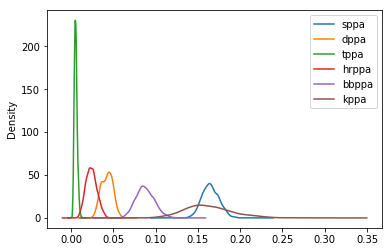

In [286]:
#now need to look into the distributions of each independent variable that is an offensive metric
#first need to create another new data frame for offensive metrics only

#identify offensive columns to keep 
off_cols_to_keep = ['sppa', 'dppa', 'tppa', 'hrppa', 'bbppa', 'kppa']

off_data = df_team[off_cols_to_keep]

off_data.plot(kind='density')

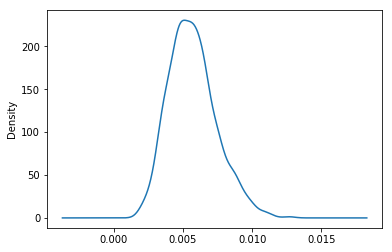

In [287]:
#hard to see the distribution of triples per pa (tppa), so can take another look without the other variables
off_data['tppa'].plot(kind='density')

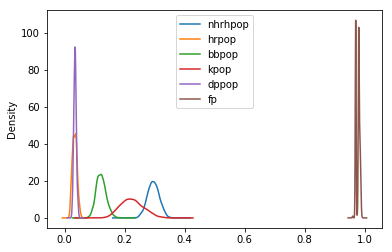

In [288]:
#can now do the same for independent variables that are defensive metrics
#have to create another new data frame for defensive metrics only

#identify defensive columns to keep 
def_cols_to_keep = ['nhrhpop', 'hrpop', 'bbpop', 'kpop', 'dppop', 'fp']

def_data = df_team[def_cols_to_keep]

def_data.plot(kind='density')

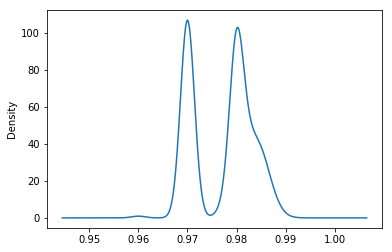

In [289]:
#hard to see the distribution of fielding percentage (fp), so can take a closer look
def_data['fp'].plot(kind='density')

It's important to note that it's not a normal distribution of fielding percentage.

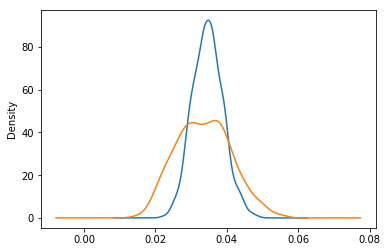

In [290]:
#also hard to see the distributions of dppop and hrpop so can take a closer look

def_data['dppop'].plot(kind='density')

def_data['hrpop'].plot(kind='density')

It looks as if dppop and hrpop both have normal distributions.

Analysis Plan: Using the offensive and defensive predictor variables, a multilinear regression model will be created to explore the association between these variables and win percentage.  

Null hypothesis: There is no association between the offensive predictor variables and win percentage. There is also no association between the defensive predictor variables and win percentage. (p-values > 0.05)

Hypothesis: There is an association between the offensive predictor variables and win percentage.  There is also an association between the defensive predictor variables and win percentage. (p-values < 0.05)

Data Dictionary: describes the final dataset used for the analysis


Variable | Description | Type of Variable
---| ---| ---
year| Year data collected | Categorical
team_id | Team from which data was collected | Categorical 
wp | Win Percentage | Continuous
sppa | Singles per Plate Appearance (offense) | Continuous
dppa | Doubles per Plate Appearance (offense) | Continuous
tppa | Triples per Plate Appearance (offense) | Continuous
hrppa | Homeruns per Plate Appearance (offense) | Continuous
bbppa | Walks per Plate Appearance (offense) | Continuous
kppa | Strikeouts per Plate Appearance (offense) | Continuous
nhrhpop | Non Homerun Hits Against per Out Pitched (defense) | Continuous
hrpop | Homeruns Against per Out Pitched (defense) | Continuous
bbpop | Walks Against per Out Pitched (defense) | Continuous
kpop | Strikeouts by Pitcher per Out Pitched (defense) | Continuous
dppop | Double Plays Made per Out Pitched (defense) | Continuous
fp | Fielding Percentage (defense) | Continuous

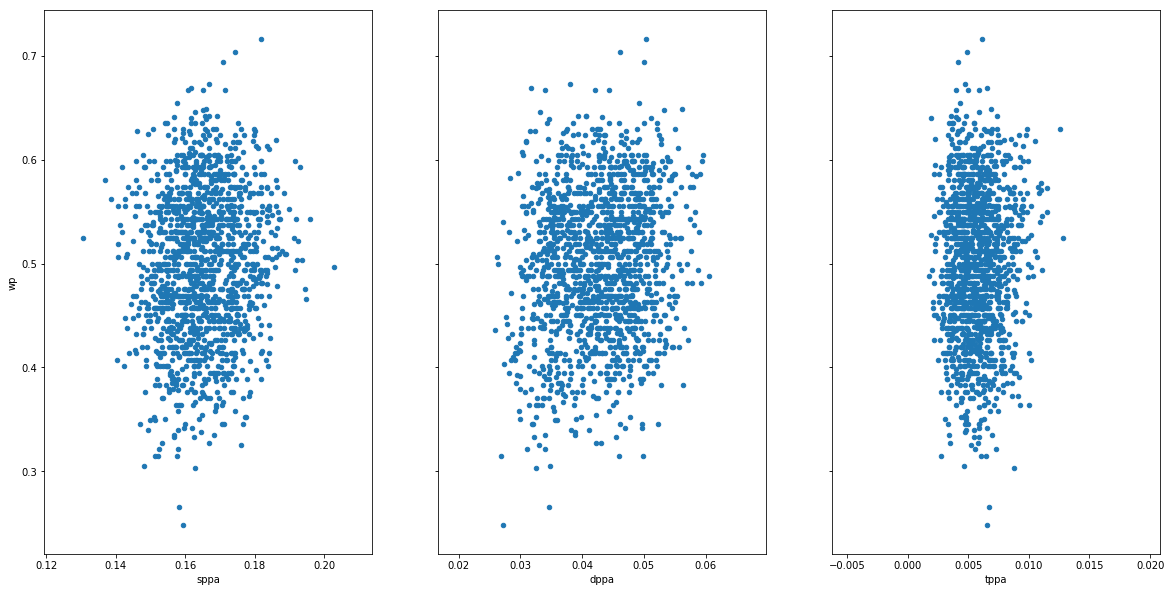

In [291]:
#now want to look at scatter plots for each offensive predictor variable and the response variable, win percentage (wp)

fig, axs = plt.subplots(1, 3, sharey=True)
#singles per plate appearance (sppa) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='sppa', y='wp', ax=axs[0], figsize=(20, 10))

#doubles per plate appearance (dppa) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='dppa', y='wp', ax=axs[1])

#triples per plate appearance (tppa) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='tppa', y='wp', ax=axs[2])

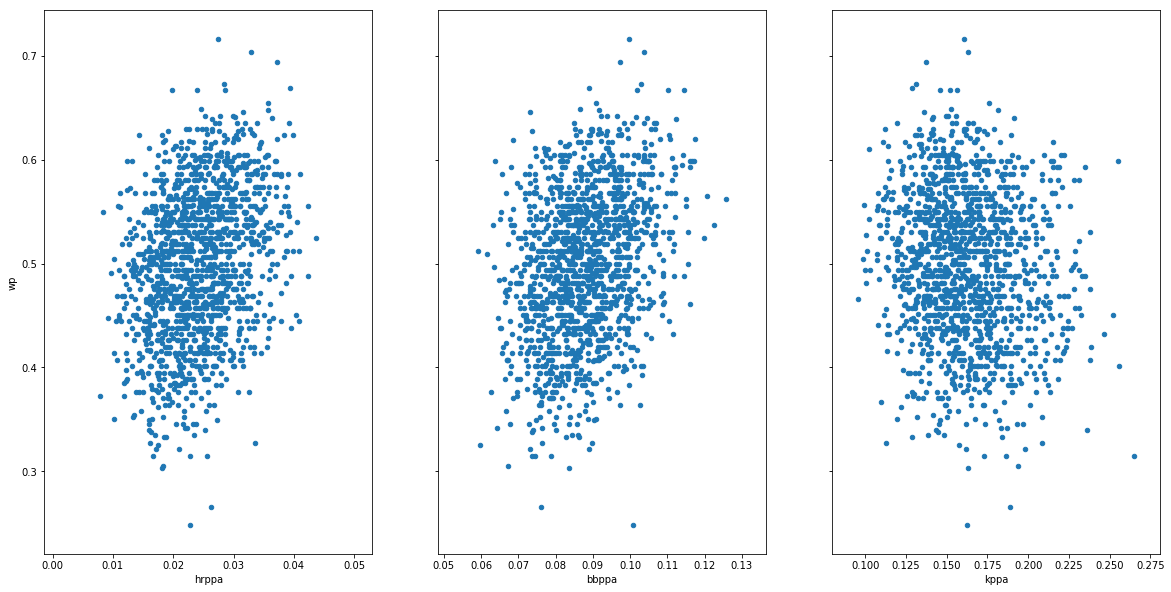

In [292]:
#more scatter plots for the other three offensive predictor variables and the response variable, win percentage (wp)

fig, axs = plt.subplots(1, 3, sharey=True)

#homeruns per plate appearance (hrppa) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='hrppa', y='wp', ax=axs[0], figsize=(20, 10))

#walks per plate appearance (bbppa) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='bbppa', y='wp', ax=axs[1])

#strikeouts per plate appearance (kppa) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='kppa', y='wp', ax=axs[2])

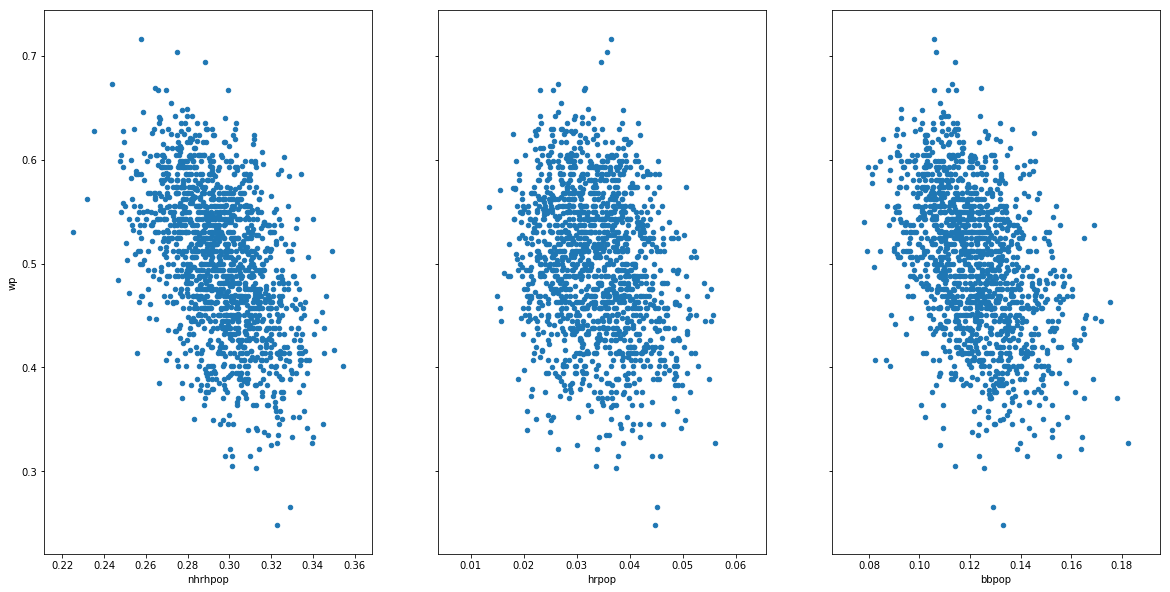

In [293]:
#now need to look at scatter plots for each defensive predictor variable and the response variable, win percentage (wp)

fig, axs = plt.subplots(1, 3, sharey=True)
#non homerun hits per out pitched (nhrhpop) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='nhrhpop', y='wp', ax=axs[0], figsize=(20, 10))

#homeruns per out pitched (hrpop) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='hrpop', y='wp', ax=axs[1])

#walks per out pitched (bbpop) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='bbpop', y='wp', ax=axs[2])

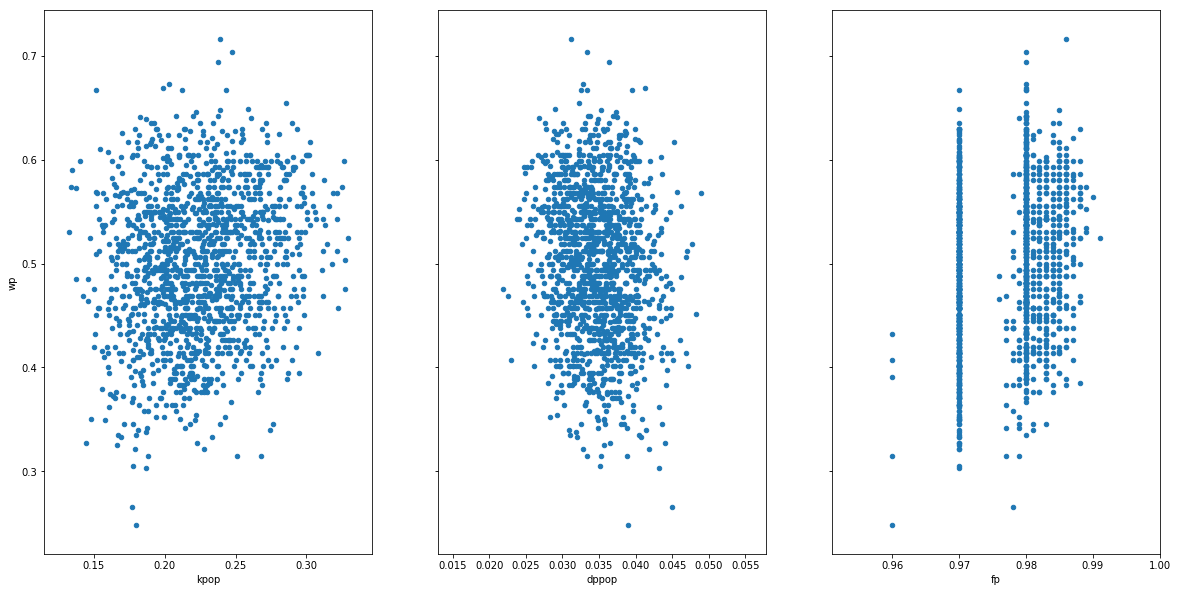

In [294]:
#last few scatter plots for the other three defensive predictor variable and the response variable, win percentage (wp)

fig, axs = plt.subplots(1, 3, sharey=True)
#strikeouts per out pitched (kpop) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='kpop', y='wp', ax=axs[0], figsize=(20, 10))

#double plays per out pitched (dppop) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='dppop', y='wp', ax=axs[1])

#fielding percentage (fp) vs. win percentage (wp)
adj_data.plot(kind='scatter', x='fp', y='wp', ax=axs[2])

From these plots, we want to further explore whether there is an association between these offensive and defensive predictor variables and the outcome (win percentage). And if there is, how strong is the relationships? Do either of these metrics have more of an impact on win percentage than others?

In [295]:
import statsmodels.formula.api as sm

#multiple linear regression model for offensive metrics
model_off = sm.ols(formula='wp ~ sppa + dppa + tppa + hrppa + bbppa + kppa', data=adj_data).fit()

model_off.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wp   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     88.36
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           1.30e-94
Time:                        17:57:45   Log-Likelihood:                 2023.5
No. Observations:                1462   AIC:                            -4033.
Df Residuals:                    1455   BIC:                            -3996.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1171      0.052     -2.263      0.024      -0.219      -0.016
sppa           1.9498      0.220      8.844      0.000       1.517       2.382
dppa           0.4860      0.284      1.714      0.087      -0.070       1.042
tppa           5.7396      0.998      5.752      0.000       3.782       7.697
hrppa          4.3379      0.324     13.375      0.000       3.702       4.974
bbppa          2.0362      0.167     12.204      0.000       1.709       2.363
kppa          -0.2591      0.080     -3.223      0.001      -0.417      -0.101
==============================================================================
Omnibus:                        6.367   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.691
Skew:                          -0.096   Prob(JB):                       0.0581
Kurtosis:                       2.762   Cond. No.                         649.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this model taking into account offensive metrics only, there is statistical significance (p < 0.05) that there is a relationship between Win Percentage and the following offsensive metrics: Singles per PA (sppa), Triples per PA (tppa), Homeruns per PA (hrppa), Walks per PA (bbppa), and Strikeouts per PA (kppa). However, there is no statistical significance (p > 0.05) of a relationship between Doubles per PA (dppa) and Win Percentage.  From this model one can also see that these predictor variables are all positively associated with Win Percentage, except for Strikeouts per Plate Appearance (this is determined based on the signs of the coefficients).

In [296]:
#multiple linear regression model for defensive metrics
model_def = sm.ols(formula='wp ~ nhrhpop + hrpop + bbpop + kpop + dppop + fp', data=adj_data).fit()

model_def.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wp   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     130.2
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          5.18e-132
Time:                        17:57:46   Log-Likelihood:                 2110.6
No. Observations:                1462   AIC:                            -4207.
Df Residuals:                    1455   BIC:                            -4170.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0058      0.301     -3.338      0.001      -1.597      -0.415
nhrhpop       -1.3249      0.093    -14.248      0.000      -1.507      -1.142
hrpop         -1.0335      0.245     -4.224      0.000      -1.513      -0.554
bbpop         -1.3155      0.103    -12.710      0.000      -1.519      -1.112
kpop           0.0193      0.056      0.348      0.728      -0.090       0.128
dppop          1.3148      0.409      3.211      0.001       0.512       2.118
fp             2.0896      0.314      6.660      0.000       1.474       2.705
==============================================================================
Omnibus:                        4.940   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.542
Skew:                          -0.086   Prob(JB):                        0.103
Kurtosis:                       2.789   Cond. No.                         456.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
#multiple linear regression model for both offensive and defensive metrics
model_all = sm.ols(formula='wp ~ sppa + dppa + tppa + hrppa + bbppa + kppa + nhrhpop + hrpop + bbpop + kpop + dppop + fp', data=adj_data).fit()

model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wp   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     506.8
Date:                Wed, 10 Jan 2018   Prob (F-statistic):               0.00
Time:                        17:57:46   Log-Likelihood:                 3001.2
No. Observations:                1462   AIC:                            -5976.
Df Residuals:                    1449   BIC:                            -5908.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2355      0.181     -1.300      0.194      -0.591       0.120
sppa           2.8315      0.120     23.692      0.000       2.597       3.066
dppa           2.6939      0.177     15.184      0.000       2.346       3.042
tppa           5.0522      0.524      9.634      0.000       4.024       6.081
hrppa          6.6918      0.188     35.530      0.000       6.322       7.061
bbppa          2.3657      0.086     27.427      0.000       2.197       2.535
kppa          -0.1488      0.052     -2.843      0.005      -0.252      -0.046
nhrhpop       -1.6657      0.056    -29.926      0.000      -1.775      -1.556
hrpop         -3.8394      0.156    -24.667      0.000      -4.145      -3.534
bbpop         -1.1778      0.057    -20.515      0.000      -1.290      -1.065
kpop          -0.0684      0.039     -1.749      0.080      -0.145       0.008
dppop          0.3817      0.226      1.689      0.091      -0.062       0.825
fp             0.5582      0.188      2.976      0.003       0.190       0.926
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.208
Skew:                          -0.070   Prob(JB):                        0.547
Kurtosis:                       2.982   Cond. No.                         953.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model performs with an r-squared of 0.808, with all p-values of the coefficients being significant (p < 0.05) except for Strikeouts per Out Pitched (kpop) and Double Plays per Out Pitched (dppop). These two predictor variables have coefficients still do not have very large p-values though (p < 0.10). From here, further attempts to improve the model will be made.

In [307]:
#see the model using scikit learn and see if it can be refined from there
from sklearn import linear_model, metrics, cross_validation
modeldata = adj_data[['sppa', 'dppa', 'tppa', 'hrppa', 'bbppa', 'kppa', 'nhrhpop', 'hrpop', 'bbpop', 'kpop', 'dppop', 'fp']]
y = adj_data.wp

In [308]:
#look into cross validation now
kf = cross_validation.KFold(len(modeldata), n_folds=7, shuffle=True)

mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    cv_lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], cv_lm.predict(modeldata.iloc[test_index])))
    scores.append(cv_lm.score(modeldata, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]

#note that it is [n-1] because have 7 training sets and 1 test set of data
    
print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.000814375417214
R2: 0.807394873479
Model 2
MSE: 0.00106777153996
R2: 0.807017715526
Model 3
MSE: 0.00101541477846
R2: 0.80747073527
Model 4
MSE: 0.00104007451736
R2: 0.807335325449
Model 5
MSE: 0.000890026235528
R2: 0.807328210472
Model 6
MSE: 0.000992638719954
R2: 0.807337098061
Model 7
MSE: 0.00106656894873
R2: 0.807207300531
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.000983838593887
Mean of R2 for all folds: 0.807298751255


The mean of the r-squared decreases very slightly to 0.807 with a 7-fold cross validation; but we're trading off potential bias error for generalized error.

In [310]:
#now see what happens to the model when regularization is taken into effect to protect from overfitting
#look into Lasso and Ridge regressions, but will likely go forth with a Ridge Regression
#this is because there are far more observations than features, and usually Ridge is best for these cases

LinM = linear_model.LinearRegression().fit(modeldata, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, LinM.predict(modeldata))
print 'OLS R2:', LinM.score(modeldata, y)

LasM = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, LasM.predict(modeldata))
print 'Lasso R2:', LasM.score(modeldata, y)

RidM = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, RidM.predict(modeldata))
print 'Ridge R2:', RidM.score(modeldata, y)

~~~ OLS ~~~
OLS MSE:  0.000964941982266
OLS R2: 0.807588327798
~~~ Lasso ~~~
Lasso MSE:  0.00501498672728
Lasso R2: 0.0
~~~ Ridge ~~~
Ridge MSE:  0.00357266401091
Ridge R2: 0.28760249923


In the first Ordinary Least Squares model, it is the same model as before with an r-squared of 0.808. This was done for reference to compare the Lasso and Ridge fits. In the Lasso model, the mean squared error (MSE) increases slightly and the r-squared goes to 0. This won't be looked into further. In the Ridge model, the MSE also slightly increases and the r-squared decreases to 0.288. From here, the Ridge model will be looked into further by analyzing the alphas -- these are the weights added to the coefficients of the predictor variables.

In [ ]:
#from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
##np.logspace(-20,0,21)

In [ ]:
##for penalty in np.logspace(-10,10,21):
    ##LasM = linear_model.Ridge(alpha=penalty).fit(modeldata, y)
    ##print "penalty", penalty
    ##print "score", LasM.score(modeldata, y)
    ##print LasM.coef_
    